<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/HW_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.1 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez #модуль для обращения к NCBI
from Bio import SeqIO # модуль для работы с нуклеотидными последовательностями
Entrez.email = "A.N.Other@example.com"
import pandas as pd
import xml.etree.ElementTree as ET
import Bio
from Bio.Seq import Seq

In [ ]:
data = pd.read_table('/content/gene_disease_associations.tsv')
data

,gene_pli,score,diseaseid,gene_dsi,protein_class_name,geneid,disease_class,disease_type,uniprotid,disease_class_name,disease_name,el,year_initial,source,ei,gene_dpi,protein_class,year_final,gene_symbol,disease_semantic_type
0,1.643200e-05,1.00,C0001080,0.391,Kinase,2261,C16;C05,disease,P22607,"Congenital, Hereditary, and Neonatal Diseas...",Achondroplasia,definitive,1994.0,CURATED,0.974,0.846,DTO_03300101,2020.0,FGFR3,Congenital Abnormality
1,1.040000e-05,0.80,C0000744,0.505,Transporter,4547,C16;C18,disease,P55157,"Congenital, Hereditary, and Neonatal Diseas...",Abetalipoproteinemia,NaN,1985.0,CURATED,0.982,0.846,DTO_05007405,2019.0,MTTP,Disease or Syndrome
2,9.973100e-01,0.80,C0001193,0.380,Kinase,2263,C16;C05,disease,P21802,"Congenital, Hereditary, and Neonatal Diseas...",Apert syndrome,NaN,1994.0,CURATED,0.976,0.808,DTO_03300101,2019.0,FGFR2,Congenital Abnormality
3,5.323500e-01,0.70,C0001418,0.236,Transcription factor,7157,C04,group,P04637,Neoplasms,Adenocarcinoma,NaN,1986.0,CURATED,0.975,0.962,DTO_05007542,2020.0,TP53,Neoplastic Process
4,8.460200e-01,0.69,C0001126,0.522,Transporter,6521,C16;C18;C13;C12,phenotype,P02730,"Congenital, Hereditary, and Neonatal Diseas...",Renal tubular acidosis,NaN,1996.0,CURATED,1.000,0.731,DTO_05007405,2013.0,SLC4A1,Disease or Syndrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,1.047800e-06,0.30,C0001430,0.578,NaN,6948,C04,group,P20062,Neoplasms,Adenoma,NaN,2007.0,CURATED,1.000,0.615,NaN,2007.0,TCN2,Neoplastic Process
454,2.095700e-32,0.30,C0001430,0.419,Transporter,9429,C04,group,Q9UNQ0,Neoplasms,Adenoma,NaN,2011.0,CURATED,1.000,0.885,DTO_05007405,2011.0,ABCG2,Neoplastic Process
455,1.000000e+00,0.30,C0001546,0.552,Epigenetic regulator,10014,F03,group,Q9UQL6,Mental Disorders,Adjustment Disorders,NaN,2007.0,CURATED,1.000,0.769,DTO_05007378,2007.0,HDAC5,Mental or Behavioral Dysfunction
456,8.919400e-01,0.30,C0001618,0.636,Enzyme modulator,2771,C04;C19,group,P04899,Neoplasms; Endocrine System Diseases,Tumors of Adrenal Cortex,NaN,NaN,CURATED,NaN,0.577,DTO_05007584,NaN,GNAI2,Neoplastic Process


In [ ]:
data['disease_name'].value_counts()

Adenocarcinoma                             116
Abortion, Tubal                            109
Spontaneous abortion                       109
Adenoma                                     36
Multiple congenital anomalies               17
Congenital Abnormality                      11
Acidosis, Lactic                             6
Acromegaly                                   5
Herpetic Acute Necrotizing Encephalitis      5
Abnormalities, Drug-Induced                  5
Renal tubular acidosis                       4
Acne Vulgaris                                4
Addison Disease                              3
Tumors of Adrenal Cortex                     3
Acrodermatitis                               3
Abruptio Placentae                           3
Acquired Immunodeficiency Syndrome           3
Massive Hepatic Necrosis                     2
Abortion, Habitual                           2
Apert syndrome                               2
Acidosis                                     2
Acute-Phase R

In [ ]:
Adenoma_data = data.loc[data['disease_name'] == 'Adenoma']
Adenoma_data

,gene_pli,score,diseaseid,gene_dsi,protein_class_name,geneid,disease_class,disease_type,uniprotid,disease_class_name,disease_name,el,year_initial,source,ei,gene_dpi,protein_class,year_final,gene_symbol,disease_semantic_type
53,9.999900e-01,0.40,C0001430,0.303,NaN,1499,C04,group,P35222,Neoplasms,Adenoma,NaN,1996.0,CURATED,0.959,0.885,NaN,2019.0,CTNNB1,Neoplastic Process
54,1.000000e+00,0.40,C0001430,0.373,NaN,324,C04,group,P25054,Neoplasms,Adenoma,NaN,1990.0,CURATED,0.967,0.962,NaN,2018.0,APC,Neoplastic Process
55,2.716000e-01,0.40,C0001430,0.318,NaN,3479,C04,group,P05019,Neoplasms,Adenoma,NaN,1992.0,CURATED,0.875,0.885,NaN,2019.0,IGF1,Neoplastic Process
56,3.357700e-04,0.40,C0001430,0.560,Ion channel,3762,C04,group,P48544,Neoplasms,Adenoma,NaN,2012.0,CURATED,1.000,0.577,DTO_01300327,2019.0,KCNJ5,Neoplastic Process
57,7.880300e-04,0.40,C0001430,0.320,Enzyme modulator,3845,C04,group,P01116,Neoplasms,Adenoma,NaN,1991.0,CURATED,0.944,0.923,DTO_05007584,2020.0,KRAS,Neoplastic Process
58,2.901500e-07,0.40,C0001430,0.406,Signaling,5617,C04,group,P01236,Neoplasms,Adenoma,NaN,1981.0,CURATED,0.981,0.885,DTO_05007599,2019.0,PRL,Neoplastic Process
59,5.590300e-01,0.40,C0001430,0.291,Signaling,596,C04,group,P10415,Neoplasms,Adenoma,NaN,1994.0,CURATED,0.950,0.885,DTO_05007599,2011.0,BCL2,Neoplastic Process
60,5.323500e-01,0.40,C0001430,0.236,Transcription factor,7157,C04,group,P04637,Neoplasms,Adenoma,NaN,1986.0,CURATED,0.911,0.962,DTO_05007542,2020.0,TP53,Neoplastic Process
61,3.044700e-15,0.40,C0001430,0.486,G-protein coupled receptor,7253,C04,group,P16473,Neoplasms,Adenoma,NaN,1993.0,CURATED,0.926,0.808,DTO_02300001,2013.0,TSHR,Neoplastic Process
62,3.616300e-01,0.40,C0001430,0.517,Chaperone,9049,C04,group,O00170,Neoplasms,Adenoma,NaN,2007.0,CURATED,1.000,0.769,DTO_05007613,2019.0,AIP,Neoplastic Process


In [ ]:
my_data = Adenoma_data['geneid']

In [ ]:
my_data


53       1499
54        324
55       3479
56       3762
57       3845
58       5617
59        596
60       7157
61       7253
62       9049
69       4583
75      23600
86       7428
87        776
96        476
105      6414
117       240
118       489
151      1545
152       492
153     54822
154       598
155      6573
156      7296
443     23512
444      2697
445      2705
446    406936
447    442910
448      4552
449      4763
450    494337
451    574456
452      5757
453      6948
454      9429
Name: geneid, dtype: int64

In [ ]:
gene_id_list = my_data.values.tolist()


In [ ]:
def seach_chromosome(gi_id):
  #Выгрузить с NCBI нуклеотидную последовательность X хромосомы, для этого узнать ID хромосомы - NC_000023.11
  handle = Entrez.efetch(db="nucleotide",
                       id="NC_000023.11",
                       rettype = 'fasta',
                       retmode = 'text')
#загружаем
  chromosome = SeqIO.read(handle, 'fasta')

  return chromosome.description

In [ ]:
def get_gene_handle(gene_id):
    gene_id = int(gene_id)
    handle = Entrez.efetch(db="gene", id=gene_id, rettype="xml")
    info = ET.parse(handle)
    handle.close()

    return info

In [ ]:
def get_gene_info(gene_id_list):
  gene_info = []
  for gene_id in gene_id_list:
    handle = Entrez.efetch(db="gene", id=gene_id, rettype = 'xml')
    gene_locus = ET.parse(handle).getroot().find("Entrezgene/Entrezgene_locus")
    region = gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
    start = int(region.find("Seq-interval_from").text) + 1
    end = int(region.find("Seq-interval_to").text) + 1
    accession = gene_locus.find("Gene-commentary/Gene-commentary_accession").text
    version = gene_locus.find("Gene-commentary/Gene-commentary_version").text
    gi_id = region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
    strand = region.find("Seq-interval_strand/Na-strand").get("value")
    chromosome_id = f"{accession}.{version}"
    gene_info.append({'gene_id': gene_id, 'start': start, 'end': end, 'gi_id': gi_id, 'strand': strand, 'nucleotide': seach_chromosome(gi_id), "chromosome_id": chromosome_id,})
  return gene_info


In [ ]:
%%time
gene_list = get_gene_info(gene_id_list)

for i in gene_list:
  print(i)

{'gene_id': 1499, 'start': 41199505, 'end': 41240443, 'gi_id': '568815595', 'strand': 'plus', 'nucleotide': 'NC_000023.11 Homo sapiens chromosome X, GRCh38.p14 Primary Assembly', 'chromosome_id': 'NC_000003.12'}
{'gene_id': 324, 'start': 112707498, 'end': 112846239, 'gi_id': '568815593', 'strand': 'plus', 'nucleotide': 'NC_000023.11 Homo sapiens chromosome X, GRCh38.p14 Primary Assembly', 'chromosome_id': 'NC_000005.10'}
{'gene_id': 3479, 'start': 102395874, 'end': 102481839, 'gi_id': '568815586', 'strand': 'minus', 'nucleotide': 'NC_000023.11 Homo sapiens chromosome X, GRCh38.p14 Primary Assembly', 'chromosome_id': 'NC_000012.12'}
{'gene_id': 3762, 'start': 128891356, 'end': 128921163, 'gi_id': '568815587', 'strand': 'plus', 'nucleotide': 'NC_000023.11 Homo sapiens chromosome X, GRCh38.p14 Primary Assembly', 'chromosome_id': 'NC_000011.10'}
{'gene_id': 3845, 'start': 25205246, 'end': 25250929, 'gi_id': '568815586', 'strand': 'minus', 'nucleotide': 'NC_000023.11 Homo sapiens chromosome

In [ ]:
data_gene = pd.DataFrame.from_dict(gene_list)
data_gene

,gene_id,start,end,gi_id,strand,nucleotide,chromosome_id
0,1499,41199505,41240443,568815595,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000003.12
1,324,112707498,112846239,568815593,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000005.10
2,3479,102395874,102481839,568815586,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000012.12
3,3762,128891356,128921163,568815587,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000011.10
4,3845,25205246,25250929,568815586,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000012.12
5,5617,22287246,22302835,568815592,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000006.12
6,596,63123346,63320090,568815580,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000018.10
7,7157,7668421,7687490,568815581,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000017.11
8,7253,80955621,81146306,568815584,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000014.9
9,9049,67483026,67491103,568815587,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000011.10


In [ ]:
gene_seq_key = data_gene[['start', 'end']]
gene_seq_key_list = gene_seq_key.values.tolist()
gene_seq_key_list

[[41199505, 41240443],
 [112707498, 112846239],
 [102395874, 102481839],
 [128891356, 128921163],
 [25205246, 25250929],
 [22287246, 22302835],
 [63123346, 63320090],
 [7668421, 7687490],
 [80955621, 81146306],
 [67483026, 67491103],
 [1074874, 1110508],
 [33986165, 34008050],
 [10141778, 10153667],
 [53494611, 53813733],
 [116373244, 116404774],
 [42799880, 42811892],
 [45374216, 45446117],
 [3923873, 3964437],
 [38067509, 38076151],
 [153517642, 153582929],
 [50557158, 50686797],
 [31664452, 31723963],
 [45502517, 45563025],
 [104215779, 104350307],
 [31937007, 32001038],
 [121435646, 121449727],
 [71215239, 71225516],
 [28861533, 28861618],
 [100307859, 100307956],
 [7850859, 7901113],
 [31094927, 31377677],
 [49020148, 49020234],
 [7017911, 7018022],
 [231708525, 231713551],
 [30607174, 30627271],
 [88090264, 88231626]]

In [ ]:
def get_dna_seq(gene_seq_key_list):
  dna_info = []
  for nucleotide in gene_seq_key_list:
    nucleotide_id = nucleotide['nucleotide']
    start = nucleotide['start']
    end = nucleotide['end']
    handle = Entrez.efetch(db="nucleotide",
                       id="568815588",
                       rettype = 'fasta',
                       retmode = 'text')

    chromosome = SeqIO.read(handle, 'fasta')
    gene_sym = chromosome.seq[start:end]
    dna_info.append({'gen seq: ': gene_sym, 'gene seq len ': str(len(gene_sym))})

  return dna_info


In [ ]:
%%time
get_dna_list = get_dna_seq(gene_list)

CPU times: user 53.9 s, sys: 16.9 s, total: 1min 10s
Wall time: 2min 20s


In [ ]:
get_dna_list

[{'gen seq: ': Seq('TAGACAGAAGAATTCTCAGTCACTTCTTTGTGTTGTGTGTATTCAAGTCACAGA...AAA'),
  'gene seq len ': '40938'},
 {'gen seq: ': Seq('AATTTTTGTATTTTTAGTAGAGACAGGGTTTCACCATGTTTGTCAGGCTGGTCT...GAT'),
  'gene seq len ': '138741'},
 {'gen seq: ': Seq('CTCCCAACTTTAGGCGGGCGTCTAAAATTCTGGGAAGCAGAACCTGGCCGGAGC...CCT'),
  'gene seq len ': '85965'},
 {'gen seq: ': Seq('GTTCAGTGTGGTTGACAGGGTTAATTCTTTCAAGGCCAAGCAGCTTCAGAGTGG...TAC'),
  'gene seq len ': '29807'},
 {'gen seq: ': Seq('TTCTAATTGTGTTTATTTGGATCTTCTCTTTTTTTTTTTTTTATTAGTCTAAAT...ATT'),
  'gene seq len ': '45683'},
 {'gen seq: ': Seq('TCCCTGCCAACCCCAGTGTTATCCAGAGGTTTTTTTTTTTTTTTTTGAGACGGA...ATA'),
  'gene seq len ': '15589'},
 {'gen seq: ': Seq('GCACCCTTCCTCAGAGTAACTACCTAATCAAAGAAACCGCTTGCTTATGTATTT...TAG'),
  'gene seq len ': '196744'},
 {'gen seq: ': Seq('TGCAAAGGATGTTTTTTATGTCTCTGTGATAATTTCATCTAAATAGGTGAGGTG...GGA'),
  'gene seq len ': '19069'},
 {'gen seq: ': Seq('CAGGAAGAGGATGGGCCAGCATCCTCCCCGCTGCAAATGGGAAACGTCCTGAGG...TAA'),
  'gene se

In [ ]:
data_dna = pd.DataFrame.from_dict(get_dna_list)
data_dna

,gen seq:,gene seq len
0,"(T, A, G, A, C, A, G, A, A, G, A, A, T, T, C, ...",40938
1,"(A, A, T, T, T, T, T, G, T, A, T, T, T, T, T, ...",138741
2,"(C, T, C, C, C, A, A, C, T, T, T, A, G, G, C, ...",85965
3,"(G, T, T, C, A, G, T, G, T, G, G, T, T, G, A, ...",29807
4,"(T, T, C, T, A, A, T, T, G, T, G, T, T, T, A, ...",45683
5,"(T, C, C, C, T, G, C, C, A, A, C, C, C, C, A, ...",15589
6,"(G, C, A, C, C, C, T, T, C, C, T, C, A, G, A, ...",196744
7,"(T, G, C, A, A, A, G, G, A, T, G, T, T, T, T, ...",19069
8,"(C, A, G, G, A, A, G, A, G, G, A, T, G, G, G, ...",190685
9,"(C, A, C, T, G, G, C, C, A, T, C, A, G, A, G, ...",8077


In [ ]:
base_ = pd.concat([data_gene, data_dna], axis = 1)



In [ ]:
base_

,gene_id,start,end,gi_id,strand,nucleotide,chromosome_id,gen seq:,gene seq len
0,1499,41199505,41240443,568815595,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000003.12,"(T, A, G, A, C, A, G, A, A, G, A, A, T, T, C, ...",40938
1,324,112707498,112846239,568815593,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000005.10,"(A, A, T, T, T, T, T, G, T, A, T, T, T, T, T, ...",138741
2,3479,102395874,102481839,568815586,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000012.12,"(C, T, C, C, C, A, A, C, T, T, T, A, G, G, C, ...",85965
3,3762,128891356,128921163,568815587,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000011.10,"(G, T, T, C, A, G, T, G, T, G, G, T, T, G, A, ...",29807
4,3845,25205246,25250929,568815586,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000012.12,"(T, T, C, T, A, A, T, T, G, T, G, T, T, T, A, ...",45683
5,5617,22287246,22302835,568815592,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000006.12,"(T, C, C, C, T, G, C, C, A, A, C, C, C, C, A, ...",15589
6,596,63123346,63320090,568815580,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000018.10,"(G, C, A, C, C, C, T, T, C, C, T, C, A, G, A, ...",196744
7,7157,7668421,7687490,568815581,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000017.11,"(T, G, C, A, A, A, G, G, A, T, G, T, T, T, T, ...",19069
8,7253,80955621,81146306,568815584,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000014.9,"(C, A, G, G, A, A, G, A, G, G, A, T, G, G, G, ...",190685
9,9049,67483026,67491103,568815587,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000011.10,"(C, A, C, T, G, G, C, C, A, T, C, A, G, A, G, ...",8077


In [ ]:
def get_protein_data(reference_id, return_first=True):
    reference_id = str(reference_id)
    handle = Entrez.efetch(db="protein", id=reference_id,
                           rettype="fasta", retmode="text")

    sequence = list(SeqIO.parse(handle, "fasta"))
    handle.close()

    if return_first:
        return sequence[0] if sequence else None
    else:
        return sequence

In [ ]:
def transcripts_proteins(handle, transcript_type="NM_", protein_type="NP_"):
    transcript_to_protein = {}

    products = handle.getroot().find("Entrezgene/Entrezgene_locus/Gene-commentary/Gene-commentary_products")
    for product in products:
        comment_type = product.find("Gene-commentary_type")
        accession = product.find("Gene-commentary_accession")

        if accession is not None and comment_type is not None:
            transcript_name = accession.text
            comment_type = comment_type.attrib["value"]
            if transcript_name.startswith(transcript_type) and comment_type == "mRNA":
                peptide = product.find("Gene-commentary_products/Gene-commentary")
                if peptide is not None:
                    comment_type = peptide.find("Gene-commentary_type")
                    accession = peptide.find("Gene-commentary_accession")

                    if accession is not None and comment_type is not None:
                        protein_name = accession.text
                        comment_type = comment_type.attrib["value"]
                        if protein_name.startswith(protein_type) and comment_type == "peptide":
                            transcript_to_protein[transcript_name] = protein_name

    return transcript_to_protein

In [ ]:
def get_protein_translation(sequence):
    if not isinstance(sequence, Bio.SeqRecord.SeqRecord):
        sequence = Seq(sequence)
    else:
        sequence = sequence.seq

    #транскрипт с мРНК
    m_rna = sequence.transcribe()

    #часть последовательности после старт-кодона
    start= "AUG"
    start = m_rna.find(start)
    m_rna = m_rna[start:]

    # трансляцию и возвращаем белок
    protein = m_rna.translate()
    protein = protein.split
    return protein

In [ ]:
# Теперь для каждого транскрипта получим изоформы из базы и возьмем самую длинную и самую короткую
longest_isoforms_from_db = []
longest_isoforms_from_db_len = []
longest_transcript_names = []
shortest_isoforms_from_db = []
shortest_isoforms_from_db_len = []
shortest_transcript_names = []

for index, row in base_.iterrows():
    gene_id = row.gene_id
    gene_handle = get_gene_handle(gene_id)
    transcripts_map = transcripts_proteins(gene_handle)

    longest_isoform = ""
    longest_transcript_name = ""
    shortest_isoform = None
    shortest_transcript_name = None
    for transcript_name, protein_name in transcripts_map.items():
        protein_isoform = str(get_protein_data(protein_name).seq)
        if len(protein_isoform) > len(longest_isoform):
            longest_transcript_name = transcript_name
            longest_isoform = protein_isoform
        if shortest_isoform is None or len(protein_isoform) < len(shortest_isoform):
            shortest_transcript_name = transcript_name
            shortest_isoform = protein_isoform

    longest_isoforms_from_db.append(str(longest_isoform))
    longest_isoforms_from_db_len.append(len(longest_isoform))
    longest_transcript_names.append(longest_transcript_name)
    shortest_isoforms_from_db.append(str(shortest_isoform))
    shortest_transcript_names.append(shortest_transcript_name)


# Заменим колонки в датафрейме
base_["longest_transcript_name"] = longest_transcript_names
base_["longest_isoform"] = longest_isoforms_from_db
base_["longest_isoform_len"] = longest_isoforms_from_db_len
base_["shortest_transcript_name"] = shortest_transcript_names
base_["shortest_isoform"] = shortest_isoforms_from_db


In [ ]:
def snps_gene(gene_name):
    handle = Entrez.esearch(
        db="snp",
        term=f"{gene_name}[All Fields]  AND pathogenic[Clinical_Significance] AND missense variant[Function_Class]",
        usehistory="y",
        retmax=20
    )
    return Entrez.read(handle)

In [ ]:
counts = []

for ind, row in base_.iterrows():
    gene_name = row.gene_id
    snps_data = snps_gene(gene_name)
    counts.append(snps_data["Count"])

base_["snps_count"] = counts

In [ ]:
def structure_for_gene(gene_name):
    handle = Entrez.esearch(
        db="structure",
        term=f"{gene_name}[All Fields]",
        usehistory="y",
        retmax=20
    )
    return Entrez.read(handle)

In [ ]:
structure_3d = []

for index, row in base_.iterrows():
    gene_name = row.gene_id
    struct_data = structure_for_gene(gene_name)
    struct_cnt = struct_data["Count"]
    structure_data = "Yes" if struct_cnt else "No"
    structure_3d.append(structure_data)

base_["3d_structure"] = structure_3d

In [ ]:
base_.head(3)

,gene_id,start,end,gi_id,strand,nucleotide,chromosome_id,gen seq:,gene seq len,longest_transcript_name,longest_isoform,longest_isoform_len,shortest_transcript_name,shortest_isoform,snps_count,3d_structure
0,1499,41199505,41240443,568815595,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000003.12,"(T, A, G, A, C, A, G, A, A, G, A, A, T, T, C, ...",40938,NM_001904,MATQADLMELDMAMEPDRKAAVSHWQQQSYLDSGIHSGATTTAPSL...,781,NM_001330729,MELDMAMEPDRKAAVSHWQQQSYLDSGIHSGATTTAPSLSGKGNPE...,59,Yes
1,324,112707498,112846239,568815593,plus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000005.10,"(A, A, T, T, T, T, T, G, T, A, T, T, T, T, T, ...",138741,NM_001407446,MYASLGSGPVAPLPASVPPSVLGSWSTGGSRSCVRQETKSPGGART...,2871,NM_001407472,MDHETASVLSSSSTHSAPRRLTSHLGTKIRAYCETCWEWQEAHEPG...,261,Yes
2,3479,102395874,102481839,568815586,minus,"NC_000023.11 Homo sapiens chromosome X, GRCh38...",NC_000012.12,"(C, T, C, C, C, A, A, C, T, T, T, A, G, G, C, ...",85965,NM_001414005,MGKISSLPTQLFKCCFCDFLKVKMHTMSSSHLFYLALCLLTFTSSA...,195,NM_001111284,MITPTVKMHTMSSSHLFYLALCLLTFTSSATAGPETLCGAELVDAL...,2,Yes


In [ ]:
base_["3d_structure"].value_counts() #Для всех генов структура известная

Yes    36
Name: 3d_structure, dtype: int64

In [ ]:
# Set environment variables before running any other code.
import os
os.environ['TF_FORCE_UNIFIED_MEMORY'] = '1'
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '4.0'

#@title 1. Install third-party software

#@markdown Please execute this cell by pressing the _Play_ button
#@markdown on the left to download and import third-party software
#@markdown in this Colab notebook. (See the [acknowledgements](https://github.com/deepmind/alphafold/#acknowledgements) in our readme.)

#@markdown **Note**: This installs the software on the Colab
#@markdown notebook in the cloud and not on your computer.

from IPython.utils import io
import os
import subprocess
import tqdm.notebook

TQDM_BAR_FORMAT = '{l_bar}{bar}| {n_fmt}/{total_fmt} [elapsed: {elapsed} remaining: {remaining}]'

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      # Uninstall default Colab version of TF.
      %shell pip uninstall -y tensorflow

      %shell sudo apt install --quiet --yes hmmer
      pbar.update(6)

      # Install py3dmol.
      %shell pip install py3dmol
      pbar.update(2)

      # Install OpenMM and pdbfixer.
      %shell rm -rf /opt/conda
      %shell wget -q -P /tmp \
        https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh \
          && bash /tmp/Miniconda3-latest-Linux-x86_64.sh -b -p /opt/conda \
          && rm /tmp/Miniconda3-latest-Linux-x86_64.sh
      pbar.update(9)

      PATH=%env PATH
      %env PATH=/opt/conda/bin:{PATH}
      %shell conda install -qy conda==23.5.2 \
          && conda install -qy -c conda-forge \
            python=3.10 \
            openmm=7.7.0 \
            pdbfixer
      pbar.update(80)

      # Create a ramdisk to store a database chunk to make Jackhmmer run fast.
      %shell sudo mkdir -m 777 --parents /tmp/ramdisk
      %shell sudo mount -t tmpfs -o size=9G ramdisk /tmp/ramdisk
      pbar.update(2)

      %shell wget -q -P /content \
        https://git.scicore.unibas.ch/schwede/openstructure/-/raw/7102c63615b64735c4941278d92b554ec94415f8/modules/mol/alg/src/stereo_chemical_props.txt
      pbar.update(1)
except subprocess.CalledProcessError:
  print(captured)
  raise

executed_cells = set([1])

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

In [ ]:
#@title 2. Download AlphaFold

#@markdown Please execute this cell by pressing the *Play* button on
#@markdown the left.

GIT_REPO = 'https://github.com/deepmind/alphafold'
SOURCE_URL = 'https://storage.googleapis.com/alphafold/alphafold_params_colab_2022-12-06.tar'
PARAMS_DIR = './alphafold/data/params'
PARAMS_PATH = os.path.join(PARAMS_DIR, os.path.basename(SOURCE_URL))

try:
  with tqdm.notebook.tqdm(total=100, bar_format=TQDM_BAR_FORMAT) as pbar:
    with io.capture_output() as captured:
      %shell rm -rf alphafold
      %shell git clone --branch main {GIT_REPO} alphafold
      pbar.update(8)
      # Install the required versions of all dependencies.
      %shell pip3 install -r ./alphafold/requirements.txt
      # Run setup.py to install only AlphaFold.
      %shell pip3 install --no-dependencies ./alphafold
      %shell pip3 install pyopenssl==22.0.0
      pbar.update(10)

      # Make sure stereo_chemical_props.txt is in all locations where it could be searched for.
      %shell mkdir -p /content/alphafold/alphafold/common
      %shell cp -f /content/stereo_chemical_props.txt /content/alphafold/alphafold/common
      %shell mkdir -p /opt/conda/lib/python3.10/site-packages/alphafold/common/
      %shell cp -f /content/stereo_chemical_props.txt /opt/conda/lib/python3.10/site-packages/alphafold/common/

      # Load parameters
      %shell mkdir --parents "{PARAMS_DIR}"
      %shell wget -O "{PARAMS_PATH}" "{SOURCE_URL}"
      pbar.update(27)

      %shell tar --extract --verbose --file="{PARAMS_PATH}" \
        --directory="{PARAMS_DIR}" --preserve-permissions
      %shell rm "{PARAMS_PATH}"
      pbar.update(55)
except subprocess.CalledProcessError:
  print(captured)
  raise

import jax
if jax.local_devices()[0].platform == 'tpu':
  raise RuntimeError('Colab TPU runtime not supported. Change it to GPU via Runtime -> Change Runtime Type -> Hardware accelerator -> GPU.')
elif jax.local_devices()[0].platform == 'cpu':
  raise RuntimeError('Colab CPU runtime not supported. Change it to GPU via Runtime -> Change Runtime Type -> Hardware accelerator -> GPU.')
else:
  print(f'Running with {jax.local_devices()[0].device_kind} GPU')

# Make sure everything we need is on the path.
import sys
sys.path.append('/opt/conda/lib/python3.10/site-packages')
sys.path.append('/content/alphafold')

executed_cells.add(2)

  0%|          | 0/100 [elapsed: 00:00 remaining: ?]

Running with Tesla T4 GPU


In [ ]:
#@title 3. Enter the amino acid sequence(s) to fold ⬇️
#@markdown Enter the amino acid sequence(s) to fold:
#@markdown * If you enter only a single sequence, the monomer model will be
#@markdown used (unless you override this below).
#@markdown * If you enter multiple sequences, the multimer model will be used.

from alphafold.notebooks import notebook_utils
# Track cell execution to ensure correct order.
notebook_utils.check_cell_execution_order(executed_cells, 3)

import enum

@enum.unique
class ModelType(enum.Enum):
  MONOMER = 0
  MULTIMER = 1

sequence_1 = 'MAAHKGAEHHHKAAEHHEQAAKHHHAAAEHHEKGEHEQAAHHADTAYAHHKHAEEHAAQAAKHDAEHHAPKPH'  #@param {type:"string"}
sequence_2 = 'MATGSRTSLLLAFGLLCLPWLQEGSAFPTIPLSRLFDNAMLRAHRLHQLAFDTYQEFNLELLRISLLLIQSWLEPVQFLRSVFANSLVYGASDSNVYDLLKDLEEGIQTLMGRLEDGSPRTGQIFKQTYSKFDTNSHNDDALLKNYGLLYCFRKDMDKVETFLRIVQCRSVEGSCGF'  #@param {type:"string"}

input_sequences = (
    sequence_1, sequence_2)

MIN_PER_SEQUENCE_LENGTH = 16
MAX_PER_SEQUENCE_LENGTH = 4000
MAX_MONOMER_MODEL_LENGTH = 2500
MAX_LENGTH = 4000
MAX_VALIDATED_LENGTH = 3000

#@markdown Select this checkbox to run the multimer model for a single sequence.
#@markdown For proteins that are monomeric in their native form, or for very
#@markdown large single chains you may get better accuracy and memory efficiency
#@markdown by using the multimer model.
#@markdown
#@markdown
#@markdown Due to improved memory efficiency the multimer model has a maximum
#@markdown limit of 4000 residues, while the monomer model has a limit of 2500
#@markdown residues.

use_multimer_model_for_monomers = False #@param {type:"boolean"}

# Validate the input sequences.
sequences = notebook_utils.clean_and_validate_input_sequences(
    input_sequences=input_sequences,
    min_sequence_length=MIN_PER_SEQUENCE_LENGTH,
    max_sequence_length=MAX_PER_SEQUENCE_LENGTH)

if len(sequences) == 1:
  if use_multimer_model_for_monomers:
    print('Using the multimer model for single-chain, as requested.')
    model_type_to_use = ModelType.MULTIMER
  else:
    print('Using the single-chain model.')
    model_type_to_use = ModelType.MONOMER
else:
  print(f'Using the multimer model with {len(sequences)} sequences.')
  model_type_to_use = ModelType.MULTIMER

# Check whether total length exceeds limit.
total_sequence_length = sum([len(seq) for seq in sequences])
if total_sequence_length > MAX_LENGTH:
  raise ValueError('The total sequence length is too long: '
                   f'{total_sequence_length}, while the maximum is '
                   f'{MAX_LENGTH}.')

# Check whether we exceed the monomer limit.
if model_type_to_use == ModelType.MONOMER:
  if len(sequences[0]) > MAX_MONOMER_MODEL_LENGTH:
    raise ValueError(
        f'Input sequence is too long: {len(sequences[0])} amino acids, while '
        f'the maximum for the monomer model is {MAX_MONOMER_MODEL_LENGTH}. You may '
        'be able to run this sequence with the multimer model by selecting the '
        'use_multimer_model_for_monomers checkbox above.')

if total_sequence_length > MAX_VALIDATED_LENGTH:
  print('WARNING: The accuracy of the system has not been fully validated '
        'above 3000 residues, and you may experience long running times or '
        f'run out of memory. Total sequence length is {total_sequence_length} '
        'residues.')

executed_cells.add(3)

Using the multimer model with 2 sequences.



Getting MSA for all sequences


  0%|          | 0/300 [elapsed: 00:00 remaining: ?]

59 unique sequences found in uniref90 for sequence 1
110 unique sequences found in smallbfd for sequence 1
66 unique sequences found in mgnify for sequence 1

230 unique sequences found in total for sequence 1



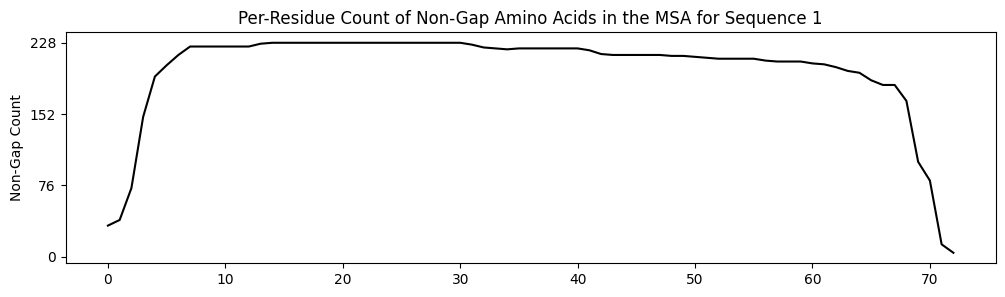

1368 unique sequences found in uniref90 for sequence 2
32 unique sequences found in smallbfd for sequence 2
35 unique sequences found in mgnify for sequence 2

1413 unique sequences found in total for sequence 2



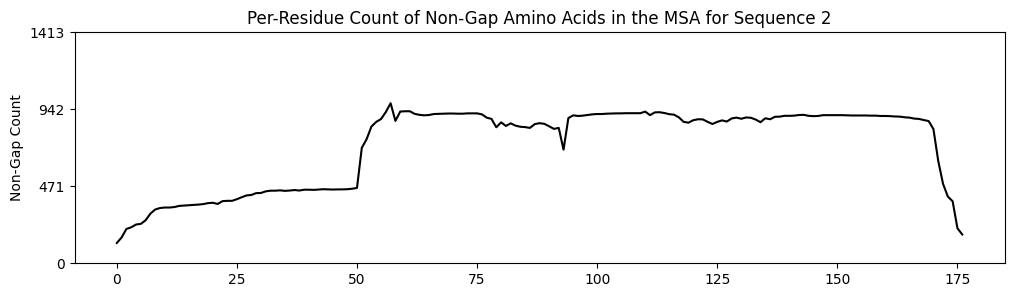

In [ ]:
#@title 4. Search against genetic databases

#@markdown Once this cell has been executed, you will see
#@markdown statistics about the multiple sequence alignment
#@markdown (MSA) that will be used by AlphaFold. In particular,
#@markdown you’ll see how well each residue is covered by similar
#@markdown sequences in the MSA.

# Track cell execution to ensure correct order
notebook_utils.check_cell_execution_order(executed_cells, 4)

# --- Python imports ---
import collections
import copy
from concurrent import futures
import json
import random
import shutil

from urllib import request
from google.colab import files
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol

from alphafold.model import model
from alphafold.model import config
from alphafold.model import data

from alphafold.data import feature_processing
from alphafold.data import msa_pairing
from alphafold.data import pipeline
from alphafold.data import pipeline_multimer
from alphafold.data.tools import jackhmmer

from alphafold.common import confidence
from alphafold.common import protein

from alphafold.relax import relax
from alphafold.relax import utils

from IPython import display
from ipywidgets import GridspecLayout
from ipywidgets import Output

# Color bands for visualizing plddt
PLDDT_BANDS = [(0, 50, '#FF7D45'),
               (50, 70, '#FFDB13'),
               (70, 90, '#65CBF3'),
               (90, 100, '#0053D6')]

# --- Find the closest source ---
test_url_pattern = 'https://storage.googleapis.com/alphafold-colab{:s}/latest/uniref90_2022_01.fasta.1'
ex = futures.ThreadPoolExecutor(3)
def fetch(source):
  request.urlretrieve(test_url_pattern.format(source))
  return source
fs = [ex.submit(fetch, source) for source in ['', '-europe', '-asia']]
source = None
for f in futures.as_completed(fs):
  source = f.result()
  ex.shutdown()
  break

JACKHMMER_BINARY_PATH = '/usr/bin/jackhmmer'
DB_ROOT_PATH = f'https://storage.googleapis.com/alphafold-colab{source}/latest/'
# The z_value is the number of sequences in a database.
MSA_DATABASES = [
    {'db_name': 'uniref90',
     'db_path': f'{DB_ROOT_PATH}uniref90_2022_01.fasta',
     'num_streamed_chunks': 62,
     'z_value': 144_113_457},
    {'db_name': 'smallbfd',
     'db_path': f'{DB_ROOT_PATH}bfd-first_non_consensus_sequences.fasta',
     'num_streamed_chunks': 17,
     'z_value': 65_984_053},
    {'db_name': 'mgnify',
     'db_path': f'{DB_ROOT_PATH}mgy_clusters_2022_05.fasta',
     'num_streamed_chunks': 120,
     'z_value': 623_796_864},
]

# Search UniProt and construct the all_seq features only for heteromers, not homomers.
if model_type_to_use == ModelType.MULTIMER and len(set(sequences)) > 1:
  MSA_DATABASES.extend([
      # Swiss-Prot and TrEMBL are concatenated together as UniProt.
      {'db_name': 'uniprot',
       'db_path': f'{DB_ROOT_PATH}uniprot_2021_04.fasta',
       'num_streamed_chunks': 101,
       'z_value': 225_013_025 + 565_928},
  ])

TOTAL_JACKHMMER_CHUNKS = sum([cfg['num_streamed_chunks'] for cfg in MSA_DATABASES])

MAX_HITS = {
    'uniref90': 10_000,
    'smallbfd': 5_000,
    'mgnify': 501,
    'uniprot': 50_000,
}


def get_msa(sequences):
  """Searches for MSA for given sequences using chunked Jackhmmer search.

  Args:
    sequences: A list of sequences to search against all databases.

  Returns:
    A dictionary mapping unique sequences to dicionaries mapping each database
    to a list of  results, one for each chunk of the database.
  """
  sequence_to_fasta_path = {}
  # Deduplicate to not do redundant work for multiple copies of the same chain in homomers.
  for sequence_index, sequence in enumerate(sorted(set(sequences)), 1):
    fasta_path = f'target_{sequence_index:02d}.fasta'
    with open(fasta_path, 'wt') as f:
      f.write(f'>query\n{sequence}')
    sequence_to_fasta_path[sequence] = fasta_path

  # Run the search against chunks of genetic databases (since the genetic
  # databases don't fit in Colab disk).
  raw_msa_results = {sequence: {} for sequence in sequence_to_fasta_path.keys()}
  print('\nGetting MSA for all sequences')
  with tqdm.notebook.tqdm(total=TOTAL_JACKHMMER_CHUNKS, bar_format=TQDM_BAR_FORMAT) as pbar:
    def jackhmmer_chunk_callback(i):
      pbar.update(n=1)

    for db_config in MSA_DATABASES:
      db_name = db_config['db_name']
      pbar.set_description(f'Searching {db_name}')
      jackhmmer_runner = jackhmmer.Jackhmmer(
          binary_path=JACKHMMER_BINARY_PATH,
          database_path=db_config['db_path'],
          get_tblout=True,
          num_streamed_chunks=db_config['num_streamed_chunks'],
          streaming_callback=jackhmmer_chunk_callback,
          z_value=db_config['z_value'])
      # Query all unique sequences against each chunk of the database to prevent
      # redunantly fetching each chunk for each unique sequence.
      results = jackhmmer_runner.query_multiple(list(sequence_to_fasta_path.values()))
      for sequence, result_for_sequence in zip(sequence_to_fasta_path.keys(), results):
        raw_msa_results[sequence][db_name] = result_for_sequence

  return raw_msa_results


features_for_chain = {}
raw_msa_results_for_sequence = get_msa(sequences)
for sequence_index, sequence in enumerate(sequences, start=1):
  raw_msa_results = copy.deepcopy(raw_msa_results_for_sequence[sequence])

  # Extract the MSAs from the Stockholm files.
  # NB: deduplication happens later in pipeline.make_msa_features.
  single_chain_msas = []
  uniprot_msa = None
  for db_name, db_results in raw_msa_results.items():
    merged_msa = notebook_utils.merge_chunked_msa(
        results=db_results, max_hits=MAX_HITS.get(db_name))
    if merged_msa.sequences and db_name != 'uniprot':
      single_chain_msas.append(merged_msa)
      msa_size = len(set(merged_msa.sequences))
      print(f'{msa_size} unique sequences found in {db_name} for sequence {sequence_index}')
    elif merged_msa.sequences and db_name == 'uniprot':
      uniprot_msa = merged_msa

  notebook_utils.show_msa_info(single_chain_msas=single_chain_msas, sequence_index=sequence_index)

  # Turn the raw data into model features.
  feature_dict = {}
  feature_dict.update(pipeline.make_sequence_features(
      sequence=sequence, description='query', num_res=len(sequence)))
  feature_dict.update(pipeline.make_msa_features(msas=single_chain_msas))
  # We don't use templates in AlphaFold Colab notebook, add only empty placeholder features.
  feature_dict.update(notebook_utils.empty_placeholder_template_features(
      num_templates=0, num_res=len(sequence)))

  # Construct the all_seq features only for heteromers, not homomers.
  if model_type_to_use == ModelType.MULTIMER and len(set(sequences)) > 1:
    valid_feats = msa_pairing.MSA_FEATURES + (
        'msa_species_identifiers',
    )
    all_seq_features = {
        f'{k}_all_seq': v for k, v in pipeline.make_msa_features([uniprot_msa]).items()
        if k in valid_feats}
    feature_dict.update(all_seq_features)

  features_for_chain[protein.PDB_CHAIN_IDS[sequence_index - 1]] = feature_dict


# Do further feature post-processing depending on the model type.
if model_type_to_use == ModelType.MONOMER:
  np_example = features_for_chain[protein.PDB_CHAIN_IDS[0]]

elif model_type_to_use == ModelType.MULTIMER:
  all_chain_features = {}
  for chain_id, chain_features in features_for_chain.items():
    all_chain_features[chain_id] = pipeline_multimer.convert_monomer_features(
        chain_features, chain_id)

  all_chain_features = pipeline_multimer.add_assembly_features(all_chain_features)

  np_example = feature_processing.pair_and_merge(
      all_chain_features=all_chain_features)

  # Pad MSA to avoid zero-sized extra_msa.
  np_example = pipeline_multimer.pad_msa(np_example, min_num_seq=512)

executed_cells.add(4)

In [ ]:
#@title 5. Run AlphaFold and download prediction

#@markdown Once this cell has been executed, a zip-archive with
#@markdown the obtained prediction will be automatically downloaded
#@markdown to your computer.

#@markdown In case you are having issues with the relaxation stage, you can disable it below.
#@markdown Warning: This means that the prediction might have distracting
#@markdown small stereochemical violations.

run_relax = True  #@param {type:"boolean"}

#@markdown Relaxation is faster with a GPU, but we have found it to be less stable.
#@markdown You may wish to enable GPU for higher performance, but if it doesn't
#@markdown converge we suggested reverting to using without GPU.

relax_use_gpu = False  #@param {type:"boolean"}


#@markdown The multimer model will continue recycling until the predictions stop
#@markdown changing, up to the limit set here. For higher accuracy, at the
#@markdown potential cost of longer inference times, set this to 20.

multimer_model_max_num_recycles = 3  #@param {type:"integer"}

# Track cell execution to ensure correct order
notebook_utils.check_cell_execution_order(executed_cells, 5)

# --- Run the model ---
if model_type_to_use == ModelType.MONOMER:
  model_names = config.MODEL_PRESETS['monomer'] + ('model_2_ptm',)
elif model_type_to_use == ModelType.MULTIMER:
  model_names = config.MODEL_PRESETS['multimer']

output_dir = 'prediction'
os.makedirs(output_dir, exist_ok=True)

plddts = {}
ranking_confidences = {}
pae_outputs = {}
unrelaxed_proteins = {}

with tqdm.notebook.tqdm(total=len(model_names) + 1, bar_format=TQDM_BAR_FORMAT) as pbar:
  for model_name in model_names:
    pbar.set_description(f'Running {model_name}')

    cfg = config.model_config(model_name)

    if model_type_to_use == ModelType.MONOMER:
      cfg.data.eval.num_ensemble = 1
    elif model_type_to_use == ModelType.MULTIMER:
      cfg.model.num_ensemble_eval = 1

    if model_type_to_use == ModelType.MULTIMER:
      cfg.model.num_recycle = multimer_model_max_num_recycles
      cfg.model.recycle_early_stop_tolerance = 0.5

    params = data.get_model_haiku_params(model_name, './alphafold/data')
    model_runner = model.RunModel(cfg, params)
    processed_feature_dict = model_runner.process_features(np_example, random_seed=0)
    prediction = model_runner.predict(processed_feature_dict, random_seed=random.randrange(sys.maxsize))

    mean_plddt = prediction['plddt'].mean()

    if model_type_to_use == ModelType.MONOMER:
      if 'predicted_aligned_error' in prediction:
        pae_outputs[model_name] = (prediction['predicted_aligned_error'],
                                   prediction['max_predicted_aligned_error'])
      else:
        # Monomer models are sorted by mean pLDDT. Do not put monomer pTM models here as they
        # should never get selected.
        ranking_confidences[model_name] = prediction['ranking_confidence']
        plddts[model_name] = prediction['plddt']
    elif model_type_to_use == ModelType.MULTIMER:
      # Multimer models are sorted by pTM+ipTM.
      ranking_confidences[model_name] = prediction['ranking_confidence']
      plddts[model_name] = prediction['plddt']
      pae_outputs[model_name] = (prediction['predicted_aligned_error'],
                                 prediction['max_predicted_aligned_error'])

    # Set the b-factors to the per-residue plddt.
    final_atom_mask = prediction['structure_module']['final_atom_mask']
    b_factors = prediction['plddt'][:, None] * final_atom_mask
    unrelaxed_protein = protein.from_prediction(
        processed_feature_dict,
        prediction,
        b_factors=b_factors,
        remove_leading_feature_dimension=(
            model_type_to_use == ModelType.MONOMER))
    unrelaxed_proteins[model_name] = unrelaxed_protein

    # Delete unused outputs to save memory.
    del model_runner
    del params
    del prediction
    pbar.update(n=1)

  # --- AMBER relax the best model ---

  # Find the best model according to the mean pLDDT.
  best_model_name = max(ranking_confidences.keys(), key=lambda x: ranking_confidences[x])

  if run_relax:
    pbar.set_description(f'AMBER relaxation')
    amber_relaxer = relax.AmberRelaxation(
        max_iterations=0,
        tolerance=2.39,
        stiffness=10.0,
        exclude_residues=[],
        max_outer_iterations=3,
        use_gpu=relax_use_gpu)
    relaxed_pdb, _, _ = amber_relaxer.process(prot=unrelaxed_proteins[best_model_name])
  else:
    print('Warning: Running without the relaxation stage.')
    relaxed_pdb = protein.to_pdb(unrelaxed_proteins[best_model_name])
  pbar.update(n=1)  # Finished AMBER relax.

# Construct multiclass b-factors to indicate confidence bands
# 0=very low, 1=low, 2=confident, 3=very high
banded_b_factors = []
for plddt in plddts[best_model_name]:
  for idx, (min_val, max_val, _) in enumerate(PLDDT_BANDS):
    if plddt >= min_val and plddt <= max_val:
      banded_b_factors.append(idx)
      break
banded_b_factors = np.array(banded_b_factors)[:, None] * final_atom_mask
to_visualize_pdb = utils.overwrite_b_factors(relaxed_pdb, banded_b_factors)


# Write out the prediction
pred_output_path = os.path.join(output_dir, 'selected_prediction.pdb')
with open(pred_output_path, 'w') as f:
  f.write(relaxed_pdb)


# --- Visualise the prediction & confidence ---
show_sidechains = True
def plot_plddt_legend():
  """Plots the legend for pLDDT."""
  thresh = ['Very low (pLDDT < 50)',
            'Low (70 > pLDDT > 50)',
            'Confident (90 > pLDDT > 70)',
            'Very high (pLDDT > 90)']

  colors = [x[2] for x in PLDDT_BANDS]

  plt.figure(figsize=(2, 2))
  for c in colors:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False, loc='center', fontsize=20)
  plt.xticks([])
  plt.yticks([])
  ax = plt.gca()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.title('Model Confidence', fontsize=20, pad=20)
  return plt

# Show the structure coloured by chain if the multimer model has been used.
if model_type_to_use == ModelType.MULTIMER:
  multichain_view = py3Dmol.view(width=800, height=600)
  multichain_view.addModelsAsFrames(to_visualize_pdb)
  multichain_style = {'cartoon': {'colorscheme': 'chain'}}
  multichain_view.setStyle({'model': -1}, multichain_style)
  multichain_view.zoomTo()
  multichain_view.show()

# Color the structure by per-residue pLDDT
color_map = {i: bands[2] for i, bands in enumerate(PLDDT_BANDS)}
view = py3Dmol.view(width=800, height=600)
view.addModelsAsFrames(to_visualize_pdb)
style = {'cartoon': {'colorscheme': {'prop': 'b', 'map': color_map}}}
if show_sidechains:
  style['stick'] = {}
view.setStyle({'model': -1}, style)
view.zoomTo()

grid = GridspecLayout(1, 2)
out = Output()
with out:
  view.show()
grid[0, 0] = out

out = Output()
with out:
  plot_plddt_legend().show()
grid[0, 1] = out

display.display(grid)

# Display pLDDT and predicted aligned error (if output by the model).
if pae_outputs:
  num_plots = 2
else:
  num_plots = 1

plt.figure(figsize=[8 * num_plots, 6])
plt.subplot(1, num_plots, 1)
plt.plot(plddts[best_model_name])
plt.title('Predicted LDDT')
plt.xlabel('Residue')
plt.ylabel('pLDDT')

if num_plots == 2:
  plt.subplot(1, 2, 2)
  pae, max_pae = list(pae_outputs.values())[0]
  plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
  plt.colorbar(fraction=0.046, pad=0.04)

  # Display lines at chain boundaries.
  best_unrelaxed_prot = unrelaxed_proteins[best_model_name]
  total_num_res = best_unrelaxed_prot.residue_index.shape[-1]
  chain_ids = best_unrelaxed_prot.chain_index
  for chain_boundary in np.nonzero(chain_ids[:-1] - chain_ids[1:]):
    if chain_boundary.size:
      plt.plot([0, total_num_res], [chain_boundary, chain_boundary], color='red')
      plt.plot([chain_boundary, chain_boundary], [0, total_num_res], color='red')

  plt.title('Predicted Aligned Error')
  plt.xlabel('Scored residue')
  plt.ylabel('Aligned residue')

# Save the predicted aligned error (if it exists).
pae_output_path = os.path.join(output_dir, 'predicted_aligned_error.json')
if pae_outputs:
  # Save predicted aligned error in the same format as the AF EMBL DB.
  pae_data = confidence.pae_json(pae=pae, max_pae=max_pae.item())
  with open(pae_output_path, 'w') as f:
    f.write(pae_data)

# --- Download the predictions ---
shutil.make_archive(base_name='prediction', format='zip', root_dir=output_dir)
files.download(f'{output_dir}.zip')

executed_cells.add(5)

NameError: ignored

In [ ]:
#не хватает мощностей для подключения